In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir(r'C:\Users\My PC\Desktop\Solar PV Fault Research\Seasonal_Dataset')

In [3]:
df = pd.read_csv('Season-3.csv')

In [4]:
df

,Unnamed: 0.1,Unnamed: 0,Date,Time,Inv,AC_Real_Power,AC_Current,DC_Power,DC_Current,Tilt_Irradiation_1,Temp_Ambient_1,Temp_Module_1,Wind_Speed_1,Hor_Irradiation_1,Operation
0,2920,2920,2019-06-01,05:45:00,Inv-1,0.00,0.00,0.00,0.00,0.0,28.3,31.4,2.559,2.2,1
1,2921,2921,2019-06-01,06:00:00,Inv-1,0.00,0.00,0.00,0.00,8.2,28.4,31.5,1.356,10.7,1
2,2922,2922,2019-06-01,06:15:00,Inv-1,1.44,6.77,1.77,3.92,26.1,28.7,31.8,1.223,26.2,1
3,2923,2923,2019-06-01,06:30:00,Inv-1,15.84,29.46,19.18,35.65,47.2,29.1,32.9,1.638,43.8,1
4,2924,2924,2019-06-01,06:45:00,Inv-1,29.47,54.35,34.78,61.22,68.0,29.7,34.1,1.797,60.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69409,6936,6936,2019-08-31,18:30:00,Inv-16,19.12,34.96,23.02,40.54,19.8,29.7,34.9,0.569,27.6,1
69410,6937,6937,2019-08-31,18:45:00,Inv-16,6.54,13.83,8.04,17.45,2.2,29.0,33.5,0.500,7.4,1
69411,6938,6938,2019-08-31,19:00:00,Inv-16,0.00,0.00,0.00,0.00,0.0,28.4,32.5,0.500,1.3,1
69412,6939,6939,2019-08-31,19:15:00,Inv-16,0.00,0.00,0.00,0.01,0.0,28.2,32.4,0.500,0.2,1


In [5]:
display(df.info(),df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69414 entries, 0 to 69413
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.1        69414 non-null  int64  
 1   Unnamed: 0          69414 non-null  int64  
 2   Date                69414 non-null  object 
 3   Time                69414 non-null  object 
 4   Inv                 69414 non-null  object 
 5   AC_Real_Power       69414 non-null  float64
 6   AC_Current          69414 non-null  float64
 7   DC_Power            69414 non-null  float64
 8   DC_Current          69414 non-null  float64
 9   Tilt_Irradiation_1  69414 non-null  float64
 10  Temp_Ambient_1      69414 non-null  float64
 11  Temp_Module_1       69414 non-null  float64
 12  Wind_Speed_1        69414 non-null  float64
 13  Hor_Irradiation_1   69414 non-null  float64
 14  Operation           69414 non-null  int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 7.9+

None

,Unnamed: 0.1,Unnamed: 0,Date,Time,Inv,AC_Real_Power,AC_Current,DC_Power,DC_Current,Tilt_Irradiation_1,Temp_Ambient_1,Temp_Module_1,Wind_Speed_1,Hor_Irradiation_1,Operation
0,2920,2920,2019-06-01,05:45:00,Inv-1,0.00,0.00,0.00,0.00,0.0,28.3,31.4,2.559,2.2,1
1,2921,2921,2019-06-01,06:00:00,Inv-1,0.00,0.00,0.00,0.00,8.2,28.4,31.5,1.356,10.7,1
2,2922,2922,2019-06-01,06:15:00,Inv-1,1.44,6.77,1.77,3.92,26.1,28.7,31.8,1.223,26.2,1
3,2923,2923,2019-06-01,06:30:00,Inv-1,15.84,29.46,19.18,35.65,47.2,29.1,32.9,1.638,43.8,1
4,2924,2924,2019-06-01,06:45:00,Inv-1,29.47,54.35,34.78,61.22,68.0,29.7,34.1,1.797,60.8,1


In [6]:
num_rows, num_columns = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 69414
Number of columns: 15


In [7]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [8]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [9]:
df.set_index('DateTime', inplace=True)

In [10]:
df.drop(['Date','Time'], axis=1, inplace=True)

In [11]:
start_time = pd.Timestamp("07:00:00")
end_time = pd.Timestamp("18:30:00")

# Filtering the data to retain only the rows within the operational hours
df = df[(df.index.time >= pd.to_datetime('7:00:00').time()) & (df.index.time <= pd.to_datetime('18:30:00').time())]

In [12]:
df.head()

,Inv,AC_Real_Power,AC_Current,DC_Power,DC_Current,Tilt_Irradiation_1,Temp_Ambient_1,Temp_Module_1,Wind_Speed_1,Hor_Irradiation_1,Operation
DateTime,,,,,,,,,,,
2019-06-01 07:00:00,Inv-1,46.52,86.12,53.23,95.12,88.6,30.0,34.5,2.846,77.4,1
2019-06-01 07:15:00,Inv-1,67.31,123.41,74.43,135.07,109.0,30.8,34.7,1.752,94.2,1
2019-06-01 07:30:00,Inv-1,93.54,170.88,101.75,175.83,235.4,32.0,36.0,3.925,181.2,1
2019-06-01 07:45:00,Inv-1,120.67,221.96,129.63,212.95,295.2,33.0,37.7,2.579,232.2,1
2019-06-01 08:00:00,Inv-1,153.92,279.81,163.37,269.89,351.2,33.3,38.8,2.614,282.7,1


In [13]:
missing_data = df.isnull().sum()
print(missing_data)
df.dropna(inplace=True)

Inv                   0
AC_Real_Power         0
AC_Current            0
DC_Power              0
DC_Current            0
Tilt_Irradiation_1    0
Temp_Ambient_1        0
Temp_Module_1         0
Wind_Speed_1          0
Hor_Irradiation_1     0
Operation             0
dtype: int64


In [14]:
scaler = MinMaxScaler()

operational_data = df
numerical_features = ['AC_Real_Power','Tilt_Irradiation_1', 'Temp_Ambient_1', 'Hor_Irradiation_1']

# Normalization of the features
operational_data[numerical_features] = scaler.fit_transform(operational_data[numerical_features])

In [15]:
X = operational_data[['Tilt_Irradiation_1', 'Temp_Ambient_1', 'Hor_Irradiation_1']]
y = operational_data['AC_Real_Power']

In [16]:
# Transformer Model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)
        x = self.transformer_encoder(x)
        x = x.squeeze(1)
        x = self.fc(x)
        return x.squeeze()

class CustomDataset(Dataset):
    def __init__(self, features, targets):
        self.features = torch.tensor(features.values, dtype=torch.float32) 
        self.targets = torch.tensor(targets.values, dtype=torch.float32)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters
input_dim = X_train.shape[1]  # Dimension of input features
num_heads = 2  # Number of attention heads = 2
hidden_dim = 200  # Hidden layers of the model = 200
num_layers = 2  # Number of transformer layers = 2
dropout = 0.1  # Dropout probability = 0.1

train_dataset = CustomDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32)

model = TransformerModel(input_dim=input_dim, num_heads=num_heads, hidden_dim=hidden_dim,
                          num_layers=num_layers, dropout=dropout)
criterion = nn.MSELoss()  # Mean Squared Error loss for regression task
optimizer = optim.Adam(model.parameters(), lr=0.001) # Optimizer used is Adam and learning rate is 0.001

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * len(inputs)
    average_loss = total_loss / len(train_dataset)
    print(f'Training - Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')

    model.eval()
    with torch.no_grad():
        total_loss = 0
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * len(inputs)
        average_loss = total_loss / len(test_dataset)
        print(f'Validation - Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')

# Evaluation
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        # Stored true labels and predictions
        y_true.extend(labels.numpy())
        y_pred.extend(outputs.numpy())


Training - Epoch [1/200], Loss: 0.0459
Validation - Epoch [1/200], Loss: 0.0151
Training - Epoch [2/200], Loss: 0.0162
Validation - Epoch [2/200], Loss: 0.0146
Training - Epoch [3/200], Loss: 0.0161
Validation - Epoch [3/200], Loss: 0.0159
Training - Epoch [4/200], Loss: 0.0159
Validation - Epoch [4/200], Loss: 0.0149
Training - Epoch [5/200], Loss: 0.0158
Validation - Epoch [5/200], Loss: 0.0166
Training - Epoch [6/200], Loss: 0.0156
Validation - Epoch [6/200], Loss: 0.0175
Training - Epoch [7/200], Loss: 0.0158
Validation - Epoch [7/200], Loss: 0.0157
Training - Epoch [8/200], Loss: 0.0154
Validation - Epoch [8/200], Loss: 0.0146
Training - Epoch [9/200], Loss: 0.0164
Validation - Epoch [9/200], Loss: 0.0161
Training - Epoch [10/200], Loss: 0.0161
Validation - Epoch [10/200], Loss: 0.0156
Training - Epoch [11/200], Loss: 0.0159
Validation - Epoch [11/200], Loss: 0.0152
Training - Epoch [12/200], Loss: 0.0160
Validation - Epoch [12/200], Loss: 0.0182
Training - Epoch [13/200], Loss: 0

Validation - Epoch [101/200], Loss: 0.0150
Training - Epoch [102/200], Loss: 0.0151
Validation - Epoch [102/200], Loss: 0.0154
Training - Epoch [103/200], Loss: 0.0151
Validation - Epoch [103/200], Loss: 0.0150
Training - Epoch [104/200], Loss: 0.0151
Validation - Epoch [104/200], Loss: 0.0150
Training - Epoch [105/200], Loss: 0.0152
Validation - Epoch [105/200], Loss: 0.0179
Training - Epoch [106/200], Loss: 0.0159
Validation - Epoch [106/200], Loss: 0.0150
Training - Epoch [107/200], Loss: 0.0152
Validation - Epoch [107/200], Loss: 0.0150
Training - Epoch [108/200], Loss: 0.0152
Validation - Epoch [108/200], Loss: 0.0162
Training - Epoch [109/200], Loss: 0.0151
Validation - Epoch [109/200], Loss: 0.0150
Training - Epoch [110/200], Loss: 0.0151
Validation - Epoch [110/200], Loss: 0.0151
Training - Epoch [111/200], Loss: 0.0150
Validation - Epoch [111/200], Loss: 0.0151
Training - Epoch [112/200], Loss: 0.0154
Validation - Epoch [112/200], Loss: 0.0154
Training - Epoch [113/200], Loss:

Validation - Epoch [199/200], Loss: 0.0155
Training - Epoch [200/200], Loss: 0.0153
Validation - Epoch [200/200], Loss: 0.0151


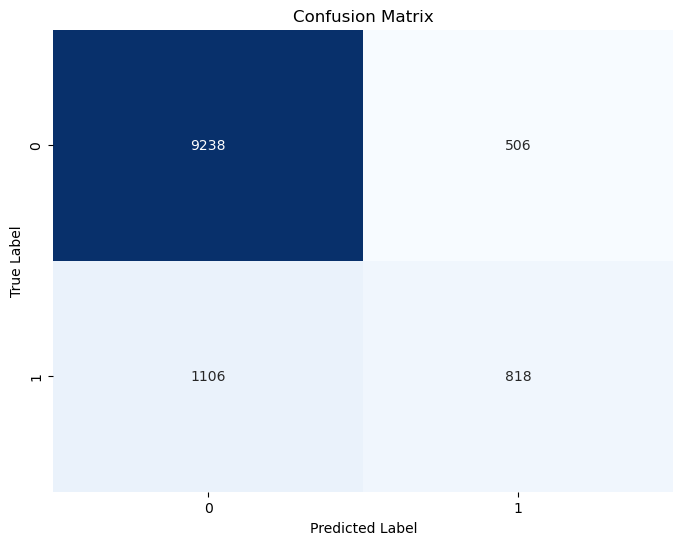

In [17]:
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        # Stored true labels and predictions
        y_true.extend(labels.numpy())
        y_pred.extend(outputs.numpy())

# Converted y_true and y_pred to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Computed confusion matrix
cm = confusion_matrix(np.round(y_true), np.round(y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Computed Mean Squared Error
mse = mean_squared_error(y_true, y_pred)

# Computed Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)

# Computed Root Mean Squared Error
rmse = np.sqrt(mse)

# Computed R2-Score
r2 = r2_score(y_true, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.015088625
Mean Absolute Error: 0.08259779
Root Mean Squared Error: 0.12283576


In [21]:
# Function to check for four consecutive faults in a day and trigger alarms where Threshold = 2 * sigma
def check_consecutive_faults(fault_indices, df, window=3):
    fault_timestamps = df.index[fault_indices]

    grouped_by_day = fault_timestamps.to_series().dt.date

    # Checked if there are three or more consecutive faults within the same day
    daily_fault_count = grouped_by_day.value_counts()
    for date, count in daily_fault_count.items():
        if count >= window:
            print(f"Alarm triggered for {count} consecutive faults on {date}.")

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

with torch.no_grad():
    predicted_ac_power = model(X_test_tensor)  # Model predictions
    actual_ac_power = torch.tensor(y_test.values, dtype=torch.float32)

    # Absolute residuals between predicted and actual AC power
    residuals = torch.abs(predicted_ac_power - actual_ac_power)

# Calculated the standard deviation for setting the fault threshold
sigma = torch.std(residuals).item()
threshold = 2 * sigma  # Set the threshold as 2 * sigma

anomalies = (residuals > threshold).int()

fault_indices = torch.nonzero(anomalies).squeeze().tolist()

check_consecutive_faults(fault_indices, df, window=4)


Alarm triggered for 27 consecutive faults on 2019-07-15.
Alarm triggered for 22 consecutive faults on 2019-08-09.
Alarm triggered for 22 consecutive faults on 2019-08-20.
Alarm triggered for 22 consecutive faults on 2019-07-21.
Alarm triggered for 21 consecutive faults on 2019-07-30.
Alarm triggered for 20 consecutive faults on 2019-08-14.
Alarm triggered for 20 consecutive faults on 2019-07-17.
Alarm triggered for 20 consecutive faults on 2019-06-27.
Alarm triggered for 20 consecutive faults on 2019-07-10.
Alarm triggered for 20 consecutive faults on 2019-06-21.
Alarm triggered for 20 consecutive faults on 2019-07-11.
Alarm triggered for 20 consecutive faults on 2019-08-24.
Alarm triggered for 20 consecutive faults on 2019-08-17.
Alarm triggered for 19 consecutive faults on 2019-07-18.
Alarm triggered for 19 consecutive faults on 2019-06-10.
Alarm triggered for 19 consecutive faults on 2019-07-08.
Alarm triggered for 18 consecutive faults on 2019-06-22.
Alarm triggered for 18 consecut

In [22]:
# Function to check for four consecutive faults in a day and trigger alarms where Threshold = 3 * sigma
def check_consecutive_faults(fault_indices, df, window=3):
    fault_timestamps = df.index[fault_indices]

    grouped_by_day = fault_timestamps.to_series().dt.date

    # Checked if there are three or more consecutive faults within the same day
    daily_fault_count = grouped_by_day.value_counts()
    for date, count in daily_fault_count.items():
        if count >= window:
            print(f"Alarm triggered for {count} consecutive faults on {date}.")

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

with torch.no_grad():
    predicted_ac_power = model(X_test_tensor)  # Model predictions
    actual_ac_power = torch.tensor(y_test.values, dtype=torch.float32)

    # Absolute residuals between predicted and actual AC power
    residuals = torch.abs(predicted_ac_power - actual_ac_power)

# Calculated the standard deviation for setting the fault threshold
sigma = torch.std(residuals).item()
threshold = 3 * sigma  # Set the threshold as 3 * sigma

anomalies = (residuals > threshold).int()

fault_indices = torch.nonzero(anomalies).squeeze().tolist()

check_consecutive_faults(fault_indices, df, window=4)


Alarm triggered for 15 consecutive faults on 2019-07-15.
Alarm triggered for 13 consecutive faults on 2019-08-09.
Alarm triggered for 12 consecutive faults on 2019-08-14.
Alarm triggered for 11 consecutive faults on 2019-08-24.
Alarm triggered for 11 consecutive faults on 2019-07-17.
Alarm triggered for 10 consecutive faults on 2019-07-21.
Alarm triggered for 10 consecutive faults on 2019-08-20.
Alarm triggered for 10 consecutive faults on 2019-07-11.
Alarm triggered for 10 consecutive faults on 2019-08-21.
Alarm triggered for 10 consecutive faults on 2019-08-11.
Alarm triggered for 10 consecutive faults on 2019-06-09.
Alarm triggered for 10 consecutive faults on 2019-08-15.
Alarm triggered for 9 consecutive faults on 2019-06-27.
Alarm triggered for 9 consecutive faults on 2019-07-09.
Alarm triggered for 9 consecutive faults on 2019-07-05.
Alarm triggered for 9 consecutive faults on 2019-08-23.
Alarm triggered for 9 consecutive faults on 2019-06-11.
Alarm triggered for 9 consecutive fa